In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [341]:
train_data = pd.read_csv("./data/train.csv")

test_data = pd.read_csv("./data/test.csv")

age_mean = train_data['Age'].mean()

train_data['Sex'].replace('female', 0, inplace=True)
train_data['Sex'].replace('male', 1, inplace=True)

train_data['Age'] = train_data['Age'].fillna(age_mean)

train_data.head(50)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [342]:
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Survivals based on Pclass

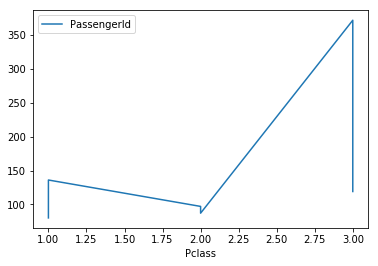

In [343]:
grouped = train_data.groupby(['Pclass', 'Survived']).count()
grouped = grouped.reset_index()
grouped[['Pclass', 'PassengerId']].plot(x='Pclass', y='PassengerId')

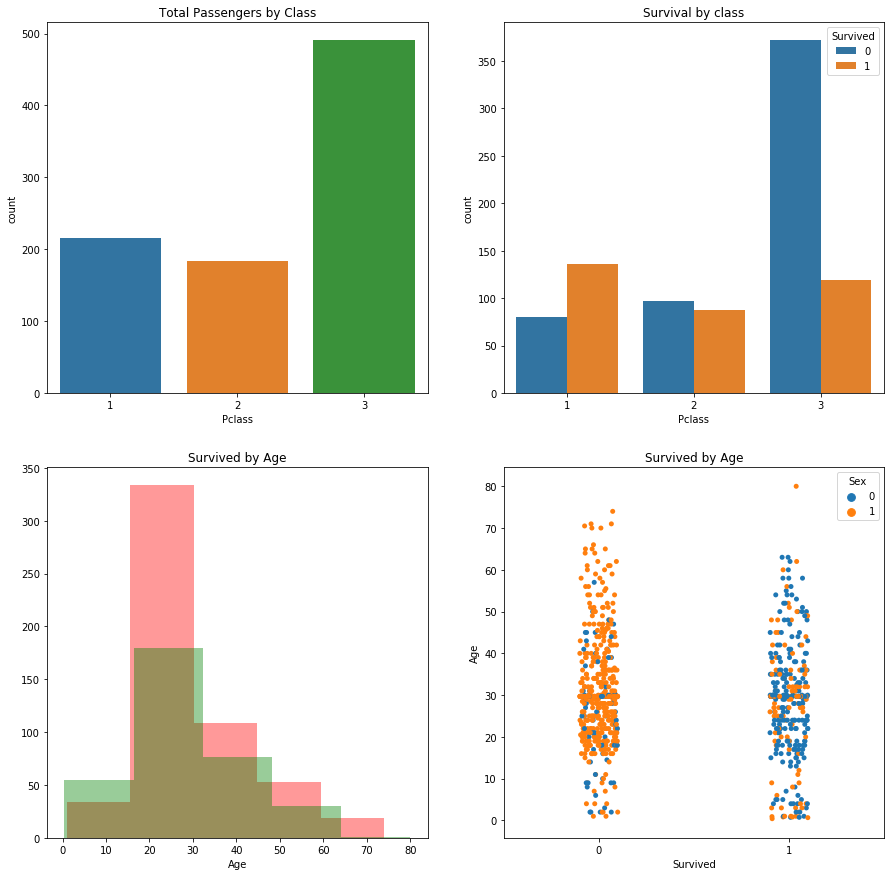

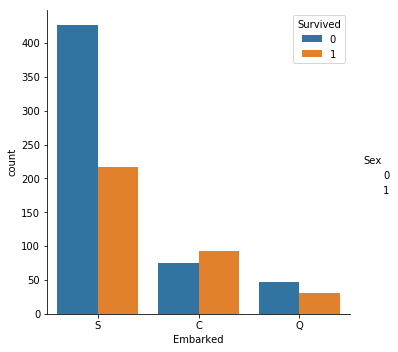

In [6]:
f, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.countplot('Pclass', data=train_data, ax=ax[0,0])
ax[0,0].set_title('Total Passengers by Class')

sns.countplot('Pclass', hue='Survived', data=train_data, ax=ax[0,1])
ax[0,1].set_title('Survival by class')

sns.distplot(train_data[train_data['Survived']==0]['Age'].dropna(),ax=ax[1,0],kde=False,color='r',bins=5)
sns.distplot(train_data[train_data['Survived']==1]['Age'].dropna(),ax=ax[1,0],kde=False,color='g',bins=5)
ax[1, 0].set_title('Survived by Age')


sns.catplot(x='Survived', y="Age", hue="Sex", data=train_data, ax=ax[1,1])
ax[1, 1].set_title('Survived by Age')

sns.countplot('Embarked', hue='Survived', data=train_data)

In [348]:
def detect_outliers(df, n, features):
    outlier_indicies = []
    
    for col in features:
        
        Q1 = np.percentile(df[col], 25)
        
        Q3 = np.percentile(df[col], 75)
    
        IQR = Q3 - Q1
        print(col)
        print(Q1)
        print(Q3)
        print(IQR)
        print('---')
        
outliers = detect_outliers(train_data, 2, ['Age', 'SibSp', 'Parch', 'Fare'])

Age
22.0
35.0
13.0
---
SibSp
0.0
1.0
1.0
---
Parch
0.0
0.0
0.0
---
Fare
7.9104
31.0
23.0896
---
